## Links
- Github repository:https://github.com/Gianna-liu/Weathering_with_you_GegeLiu
    - scripts/: This folder contains the Jupyter Notebook, PDF, and HTML files used for data analysis and documentation.

    - streamlitApp/: This folder contains all the files required to develop and run the Streamlit application.

    - requirements.txt: This file lists all the Python package dependencies required to run the project, allowing easy installation via pip install -r requirements.txt.

- streamlit App: https://weatheringwithyou-gegeliu.streamlit.app/

## Development Log
During this assignment, I worked with both Jupyter Notebook and Streamlit to explore, analyze, and visualize the dataset.

- In Jupyter Notebook, I first examined the data structure by checking the dataset’s shape and displaying the first and last five rows to gain an overall understanding. I then followed the task description, focusing on visualizing the dataset. Since the dataset contains almost 8,000 rows, it was impractical to display each row individually on the x-axis using `Matplotlib`. To address this, I resampled the dataset with `Pandas`, aggregating the mean of values for each day. To visualize multiple columns together interactively, I learned to use the `Plotly` module, which allows dynamic and interactive plots and automatically adjusts the x-axis and layout, making it much easier to explore the data.

- For the Streamlit app, I began by setting up the basic page structure. 

    - On the home page, I added essential elements such as the title and icon. 

    - On Page 1, I created a table using the `LineChartColumn()` function to visualize trends. Understanding the required data format for this function took some time, as I needed each column to correspond correctly to its y-axis. 

    - While developing Page 2, I realized the importance of reusable code and caching for efficient data loading. I created a `load_data()`function, decorated with `@st.cache_data`, and placed it in utils.py along with other utility functions. This allowed multiple pages to access the dataset efficiently. I added interactive widgets such as `selectbox` and `select_slider`, following Streamlit documentation examples, to enable dynamic user interaction. To enhance visualization, I used `Plotly` to draw interactive plots that respond to the widgets, allowing users to filter and display subsets of the data dynamically.

After testing the Streamlit app locally, I proceeded to connect it to the GitHub repository. During this process, I encountered issues related to file paths. The `Jupyter Notebook` was uploaded in a separate folder on GitHub, and my `home.py` file was not located in the root directory, so the app could not locate the CSV file correctly.

To solve this problem, I explanded the load_data() function to dynamically locate the project root by searching for the .git folder, ensuring that the data file paths are correctly resolved regardless of where the script is executed. After addressing these path issues, the Streamlit app ran smoothly both locally and on GitHub.


## AI usage
During this assignment, I used GitHub Copilot in my VS Code environment to help review and debug code. As mentioned earlier, I encountered issues with file paths when connecting the Streamlit app to GitHub, so I consulted ChatGPT to find a solution. Additionally, when I attempted to convert the Jupyter Notebook to a PDF file, the interactive Plotly plots did not display properly. I again turned to ChatGPT to explore methods to address this issue.

## Tasks

### Library imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Task1: Read and explore the dataset

In [3]:
df = pd.read_csv('../StreamlitApp/data/open-meteo-subset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [5]:
df.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


In [6]:
# show the first five lines
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [7]:
# show the last five lines
df.tail()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
8755,2020-12-30T19:00,-6.5,0.0,1.6,4.0,58
8756,2020-12-30T20:00,-7.0,0.0,1.2,3.4,50
8757,2020-12-30T21:00,-7.5,0.0,1.1,2.4,22
8758,2020-12-30T22:00,-7.2,0.0,0.6,1.6,22
8759,2020-12-30T23:00,-7.5,0.0,0.5,0.7,8


### Task 2: Plot each column separately

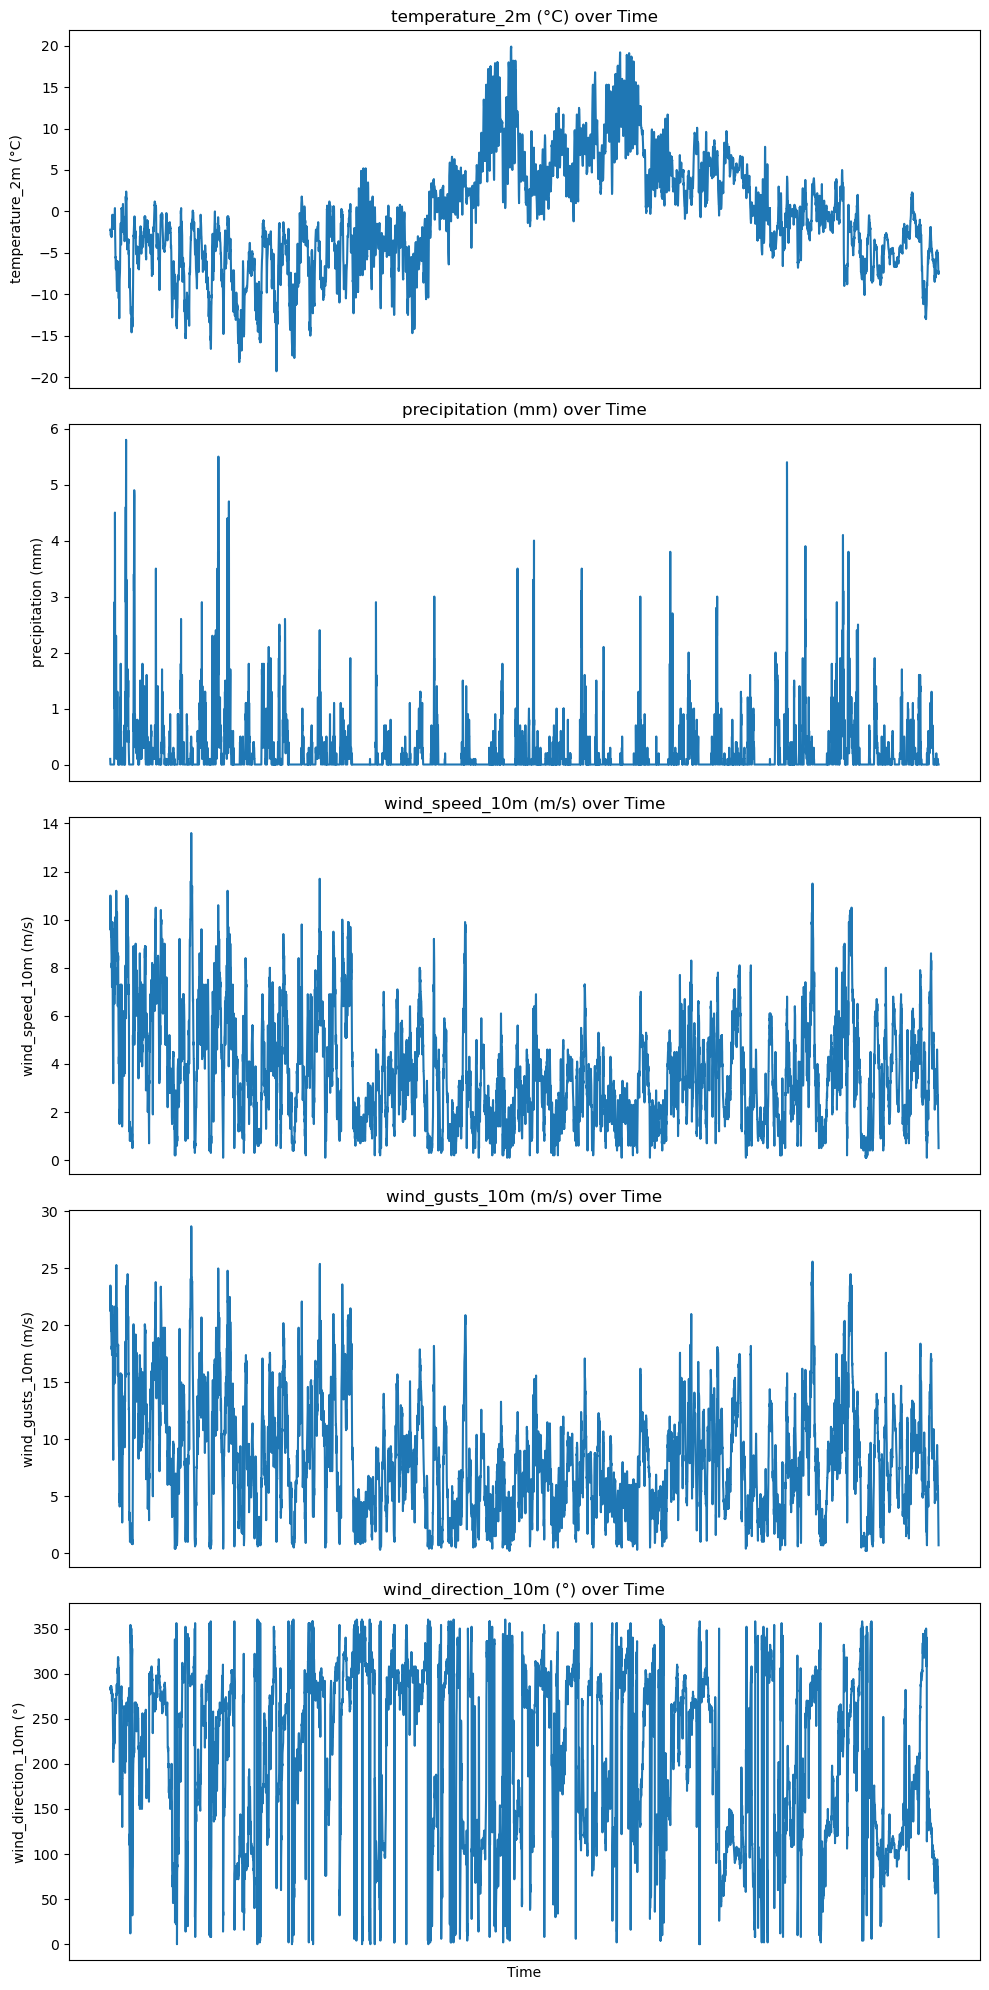

In [8]:
fig, ax = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

for i, col in enumerate(df.columns[1:6]):
    ax[i].plot(df['time'], df[col])
    ax[i].set_ylabel(col)
    ax[i].set_title(f'{col} over Time')
    ax[i].set_xticks([]) 

ax[-1].set_xlabel('Time') 
plt.tight_layout()
plt.show()

### Task 2(resampling): Resample the original dataset to show the x-axis

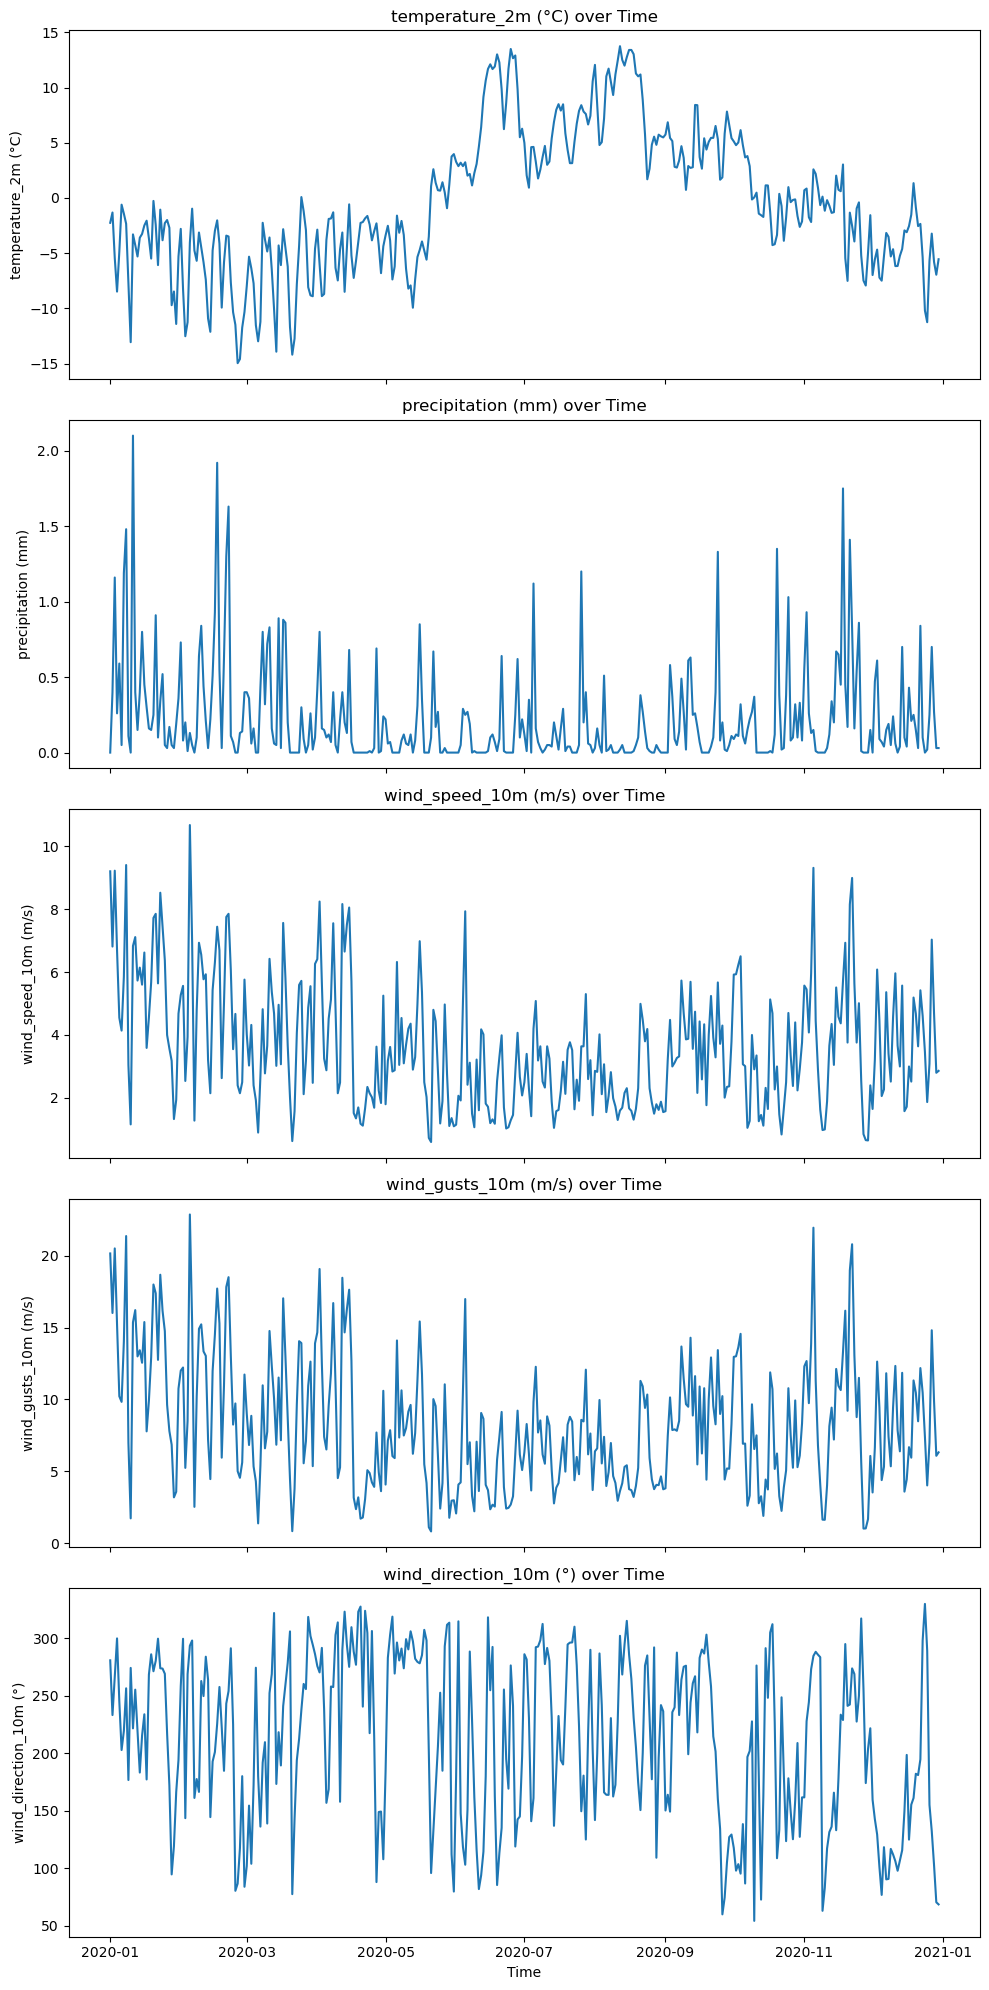

In [9]:
# calculate the mean value of each day
df_day = df.copy()
df_day['time'] = pd.to_datetime(df_day['time'])
df_day = df_day.resample('D', on='time').mean().reset_index().round(2)

fig, ax = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

for i, col in enumerate(df_day.columns[1:6]):
    ax[i].plot(df_day['time'], df_day[col])
    ax[i].set_ylabel(col)
    ax[i].set_title(f'{col} over Time')

ax[-1].set_xlabel('Time') 
plt.tight_layout()
plt.show()

### Task 3: Plot all columns together.

In [10]:
# use the plotly module to plot
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"
# jupyter nbconvert CA1.ipynb --to html --execute

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_day['time'], y=df_day['temperature_2m (°C)'],mode='lines',name='temperature_2m (°C)'))
fig.add_trace(go.Scatter(x=df_day['time'], y=df_day['precipitation (mm)'],mode='lines',name='precipitation (mm)'))
fig.add_trace(go.Scatter(x=df_day['time'], y=df_day['wind_speed_10m (m/s)'],mode='lines',name='wind_speed_10m (m/s)'))
fig.add_trace(go.Scatter(x=df_day['time'], y=df_day['wind_gusts_10m (m/s)'],mode='lines',name='wind_gusts_10m (m/s)'))
fig.add_trace(go.Scatter(x=df_day['time'], y=df_day['wind_direction_10m (°)'],mode='lines',name='wind_direction_10m (°)'))
fig.show()
